# Ch06_08
## In this exercise, we will generate simulated data, and will then use this data to perform forward and backward stepwise selection.

## (a) Create a random number generator and use its normal() method to generate a predictor X of length n = 100, as well as a noise vector e of length n = 100.

In [2]:
import numpy as np

# Set random seed for reproducibility
rng = np.random.default_rng(seed=0)

# Define the number of observations
n = 100

# Generate predictor X from a standard normal distribution
X = rng.normal(0, 1, n)

# Generate noise vector e from a standard normal distribution
e = rng.normal(0, 1, n)

## (b) Generate a response vector Y of length n = 100 according to the model
## Y = β0 + β1X + β2X2 + β3X3 + e,

## where β0, β1, β2, and β3 are constants of your choice.

In [4]:
# Set constants for the model
beta_0 = 2.0
beta_1 = 0.5
beta_2 = -1.0
beta_3 = 0.3

# Generate the response vector Y according to the model
Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + e

## (c) Use forward stepwise selection in order to select a model containing the predictors X,X^2, . . . ,X^10. What is the model obtained according to Cp? Report the coefficients of the model obtained.

In [6]:
import pandas as pd
import statsmodels.api as sm

# 準備模型矩陣 X, X^2, ..., X^10
predictors = [X**i for i in range(1, 11)]
X_data = pd.DataFrame(np.column_stack(predictors), columns=[f'X^{i}' for i in range(1, 11)])
X_data.insert(0, 'Intercept', 1)  # 添加截距項

# 計算 Mallows Cp
def calculate_cp(model, sigma2, n):
    SSE = np.sum(model.resid**2)  # 殘差平方和
    p = model.df_model + 1  # 模型中參數個數
    Cp = SSE / sigma2 - (n - 2 * p)
    return Cp

# 前向逐步選擇 (Forward Stepwise Selection)
selected_predictors = []
remaining_predictors = list(X_data.columns[1:])  # 所有候選變數
sigma2 = np.var(e)  # 噪聲的方差
best_cp = float('inf')
final_model = None

while remaining_predictors:
    best_feature = None
    for feature in remaining_predictors:
        # 試圖加入該變數
        current_features = selected_predictors + [feature]
        X_subset = X_data[['Intercept'] + current_features]
        model = sm.OLS(Y, X_subset).fit()

        # 計算 Cp
        cp = calculate_cp(model, sigma2, n)
        if cp < best_cp:
            best_cp = cp
            final_model = model
            best_feature = feature

    # 若沒有新變數改進模型，則停止
    if best_feature is None:
        break

    # 更新選擇的變數和剩餘的變數
    selected_predictors.append(best_feature)
    remaining_predictors.remove(best_feature)
    print(f"Selected predictor: {best_feature}, Cp: {best_cp:.4f}")

# 報告結果
print("\nFinal selected predictors:", selected_predictors)
print("Model coefficients:\n", final_model.params)


Selected predictor: X^10, Cp: 110.7734
Selected predictor: X^1, Cp: 46.4912
Selected predictor: X^2, Cp: 6.6701
Selected predictor: X^9, Cp: 6.0230

Final selected predictors: ['X^10', 'X^1', 'X^2', 'X^9']
Model coefficients:
 Intercept    1.910565
X^10         0.000057
X^1          1.038408
X^2         -0.910286
X^9          0.001548
dtype: float64


## (d) Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)?

In [8]:
# Initialize variables
current_predictors = list(X_data.columns[1:])  # Start with all predictors
best_cp = float('inf')
final_model = None
sigma2 = np.var(e)  # Noise variance

while len(current_predictors) > 0:
    best_model = None
    worst_feature = None
    for feature in current_predictors:
        # Test the model without the current feature
        predictors = [p for p in current_predictors if p != feature]
        X_subset = X_data[['Intercept'] + predictors]
        model = sm.OLS(Y, X_subset).fit()

        # Calculate Cp
        cp = calculate_cp(model, sigma2, n)
        if cp < best_cp:
            best_cp = cp
            best_model = model
            worst_feature = feature

    # Stop if no improvement in Cp
    if worst_feature is None:
        break

    # Update the predictors by removing the worst feature
    current_predictors.remove(worst_feature)
    final_model = best_model
    print(f"Removed predictor: {worst_feature}, Cp: {best_cp:.4f}")

# Report the final model
print("\nFinal selected predictors:", current_predictors)
print("Model coefficients:\n", final_model.params)
print("The answer of (c) and (d) are different.")

Removed predictor: X^6, Cp: 9.7311
Removed predictor: X^4, Cp: 7.7717
Removed predictor: X^1, Cp: 6.3094
Removed predictor: X^10, Cp: 5.3278
Removed predictor: X^8, Cp: 3.5059

Final selected predictors: ['X^2', 'X^3', 'X^5', 'X^7', 'X^9']
Model coefficients:
 Intercept    1.858902
X^2         -0.778352
X^3          3.010777
X^5         -2.183416
X^7          0.553284
X^9         -0.043747
dtype: float64
The answer of (c) and (d) are different.


## (e) Now fit a lasso model to the simulated data, again using X,X^2,. . . ,X^10 as predictors. Use cross-validation to select the optimal value of λ Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates, and discuss the results obtained.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0720606638168988, tolerance: 0.03100933246177036
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1486090057379243, tolerance: 0.03100933246177036
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23639500546110526, tolerance: 0.03100933246177036
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: Conv

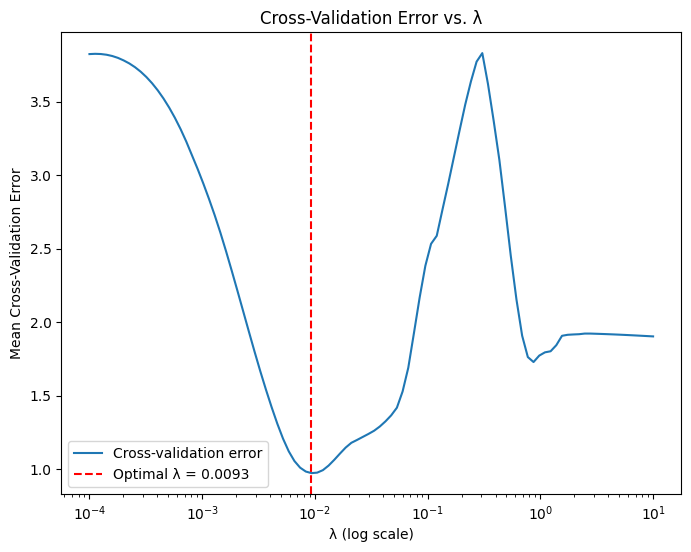

Optimal λ: 0.0093260334688322

Lasso Coefficients:
X^1     0.763746
X^2    -0.811852
X^3     0.475248
X^4    -0.013998
X^5    -0.178196
X^6    -0.009765
X^7    -0.001080
X^8    -0.001209
X^9     0.006383
X^10    0.001091
dtype: float64


In [9]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

# Prepare predictors X, X^2, ..., X^10
X_poly = np.column_stack([X**i for i in range(1, 11)])

# Fit a Lasso model with cross-validation
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 100), cv=10, random_state=42)
lasso_cv.fit(X_poly, Y)

# Optimal lambda
optimal_lambda = lasso_cv.alpha_

# Plot cross-validation error as a function of lambda
plt.figure(figsize=(8, 6))
plt.plot(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1), label="Cross-validation error")
plt.axvline(x=optimal_lambda, color="red", linestyle="--", label=f"Optimal λ = {optimal_lambda:.4f}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Mean Cross-Validation Error")
plt.title("Cross-Validation Error vs. λ")
plt.legend()
plt.show()

# Report coefficients
coef = pd.Series(lasso_cv.coef_, index=[f"X^{i}" for i in range(1, 11)])
print(f"Optimal λ: {optimal_lambda}")
print("\nLasso Coefficients:")
print(coef)

## (f) Now generate a response vector Y according to the model
## Y = β0 + β7X^7 + e,
## and perform forward stepwise selection and the lasso. Discuss the results obtained.

Selected predictor: X^7, Cp: 5.0749
Selected predictor: X^9, Cp: 2.3993
Selected predictor: X^1, Cp: 2.3993

Final selected predictors using Forward Stepwise Selection: ['X^7', 'X^9', 'X^1']
Model coefficients:
const    2.043417
X^1     -0.040177
X^7      0.587346
X^9     -0.019421
X^1     -0.040177
dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.391108085713057, tolerance: 1.1711570463827998
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4753091014115114, tolerance: 1.1711570463827998
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5037996658691668, tolerance: 1.1711570463827998
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: Convergen

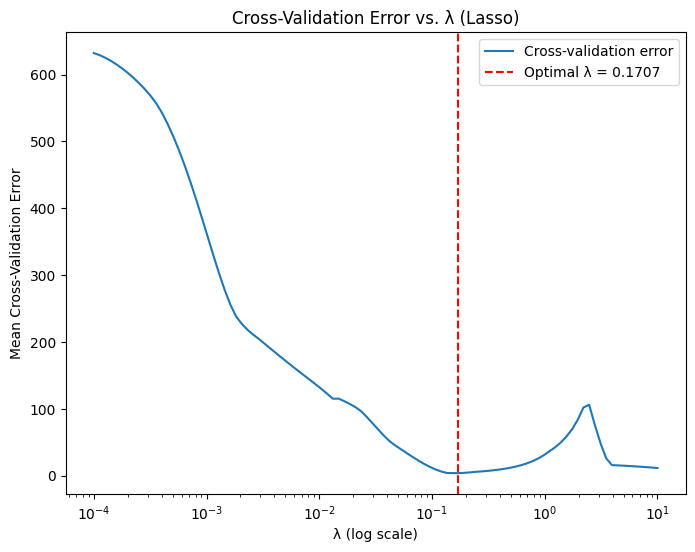


Optimal λ: 0.17073526474706904

Lasso Coefficients:
X^1     0.000000
X^2    -0.000000
X^3     0.000000
X^4    -0.000000
X^5     0.000000
X^6    -0.000000
X^7     0.508312
X^8    -0.022916
X^9    -0.001622
X^10    0.004718
dtype: float64


In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV

# 1. Data Generation
n = 100
rng = np.random.default_rng(seed=42)
X = rng.normal(0, 1, n)
e = rng.normal(0, 1, n)
beta_0 = 2.0
beta_7 = 0.5
Y = beta_0 + beta_7 * X**7 + e  # Only X^7 is relevant

# Prepare predictors X, X^2, ..., X^10
X_poly = np.column_stack([X**i for i in range(1, 11)])

# 2. Forward Stepwise Selection
def calculate_cp(model, sigma2, n):
    SSE = np.sum(model.resid**2)  # Residual sum of squares
    p = model.df_model + 1  # Number of parameters in the model
    Cp = SSE / sigma2 - (n - 2 * p)
    return Cp

# Forward stepwise selection
selected_predictors = []
remaining_predictors = [f"X^{i}" for i in range(1, 11)]
sigma2 = np.var(e)
best_cp = float('inf')
final_model = None

while remaining_predictors:
    best_feature = None
    for feature in remaining_predictors:
        current_features = selected_predictors + [feature]
        X_subset = np.column_stack([X**i for i in range(1, 11)])
        X_subset = pd.DataFrame(X_subset, columns=[f"X^{i}" for i in range(1, 11)])

        # Add intercept term
        X_subset_with_intercept = sm.add_constant(X_subset[['X^1'] + current_features])
        model = sm.OLS(Y, X_subset_with_intercept).fit()

        cp = calculate_cp(model, sigma2, n)
        if cp < best_cp:
            best_cp = cp
            final_model = model
            best_feature = feature

    if best_feature is None:
        break

    selected_predictors.append(best_feature)
    remaining_predictors.remove(best_feature)
    print(f"Selected predictor: {best_feature}, Cp: {best_cp:.4f}")

# Forward stepwise final model
print("\nFinal selected predictors using Forward Stepwise Selection:", selected_predictors)
print("Model coefficients:")
print(final_model.params)

# 3. Lasso Regression
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 100), cv=10, random_state=42)
lasso_cv.fit(X_poly, Y)

optimal_lambda = lasso_cv.alpha_

# Plot cross-validation error as a function of λ
plt.figure(figsize=(8, 6))
plt.plot(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1), label="Cross-validation error")
plt.axvline(x=optimal_lambda, color="red", linestyle="--", label=f"Optimal λ = {optimal_lambda:.4f}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Mean Cross-Validation Error")
plt.title("Cross-Validation Error vs. λ (Lasso)")
plt.legend()
plt.show()

# Report Lasso coefficients
coef = pd.Series(lasso_cv.coef_, index=[f"X^{i}" for i in range(1, 11)])
print(f"\nOptimal λ: {optimal_lambda}")
print("\nLasso Coefficients:")
print(coef)
